Домашняя работа

0. Постановка задачи. 

Задача, представленная в наборе данных Adult Income, заключается в предсказании, превысит ли годовой доход человека 50 тысяч долларов, на основе таких факторов, как возраст, образование, пол и другие характеристики. Это задача бинарной классификации, где метка класса определяет доход (менее или более 50K).

1. Чтение данных.

Для того чтобы считать данные из CSV-файла, используем библиотеку pandas:

In [2]:
import pandas as pd
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


2. Построение визуализаций и анализ основных характеристик данных

Основные характеристики данных:

                   count           mean            std      min       25%  \
age              48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt           48842.0  189664.134597  105604.025423  12285.0  117550.5   
educational-num  48842.0      10.078089       2.570973      1.0       9.0   
capital-gain     48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss     48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week   48842.0      40.422382      12.391444      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178144.5  237642.0  1490400.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0  

Correlation matrix of numerical features:



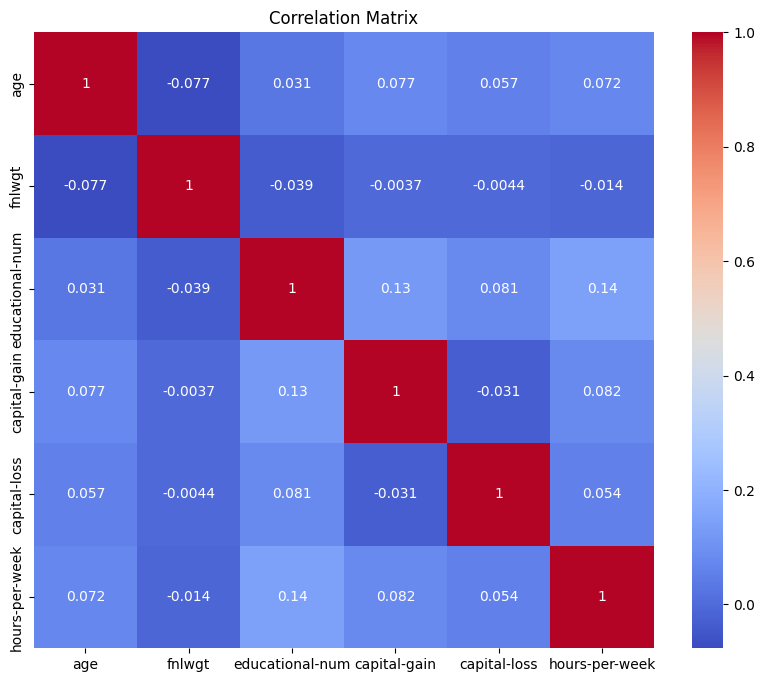


Frequency of categorical values:


Value distribution for workclass:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Value distribution for education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Value distribution for marital-status:
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("adult.csv")

numeric_data = data.select_dtypes(include=['int64', 'float64'])

print("Основные характеристики данных:\n")
print(numeric_data.describe().T)

print("\nCorrelation matrix of numerical features:\n")
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

print("\nFrequency of categorical values:\n")
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_columns:
    print(f"\nValue distribution for {col}:")
    print(data[col].value_counts())

print("\nDistribution of the target variable 'income':\n")
print(data['income'].value_counts())

3. Обработать пропущенные значения

Проверим на пропуски

In [15]:
print(data.isnull().sum())  # Количество пропущенных значений

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


4. Обработать категориальные признаки

Для преобразования категориальных признаков можно применить One-Hot Encoding:

In [16]:
data = pd.get_dummies(data, drop_first=True)

5. Провести нормализацию

Определим, требуется ли нормализация (например, она критична для KNN). Для нормализации можно использовать StandardScaler из библиотеки sklearn:

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["age", "educational-num", "hours-per-week"]

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data[numerical_features].head())


        age  educational-num  hours-per-week
0 -0.995129        -1.197259       -0.034087
1 -0.046942        -0.419335        0.772930
2 -0.776316         0.747550       -0.034087
3  0.390683        -0.030373       -0.034087
4 -1.505691        -0.030373       -0.841104


6. Разбить данные на обучающую и тестовую выборки

Разделим данные на две части: обучающую и тестовую выборки:

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("income_>50K", axis=1)
y = data["income_>50K"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7. Запустить классификатор

Попробуем алгоритм K-Nearest Neighbors, пояснив выбор: KNN чувствителен к метрике расстояний, что делает нормализацию данных необходимой:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

8. Вычислить ошибки и подобрать гиперпараметр

Проведем оценку точности и выберем наилучшее количество соседей:

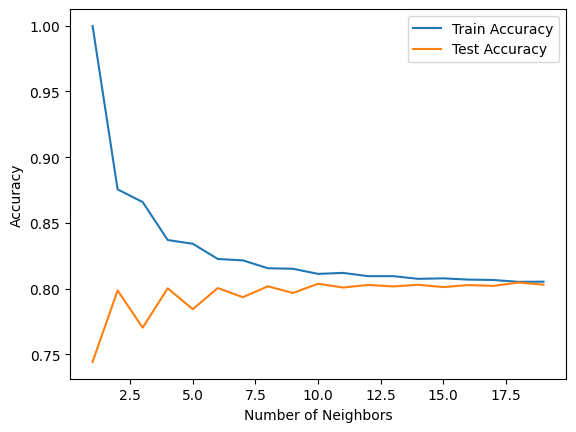

In [24]:
from sklearn.metrics import accuracy_score

train_accuracy = []
test_accuracy = []
neighbors = range(1, 20)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.plot(neighbors, test_accuracy, label="Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Выводы:

1. Предобработка данных.
Для обработки пропущенных значений числовые признаки были заполнены медианой, а категориальные — наиболее частыми значениями. Этот шаг необходим для обеспечения корректности данных и предотвращения искажений при обучении модели.

2. Обработка признаков.
Числовые признаки, такие как age, educational-num и hours-per-week, были стандартизированы с помощью StandardScaler. Стандартизация важна для алгоритмов, чувствительных к масштабу признаков, например, для логистической регрессии и SVM. Для категориальных признаков был использован метод one-hot encoding, чтобы преобразовать их в числовой вид, что позволяет модели более эффективно работать с такими данными.

3. Целевая переменная.
Целевой переменной был выбран показатель дохода (income), который является бинарной переменной (<=50K или >50K). Прогнозирование этой переменной позволяет оценить доход на основе других характеристик, что важно для анализа факторов, влияющих на заработок.

4. Обучение модели.
Для классификации была использована модель логистической регрессии. Это линейный классификатор, который хорошо работает с задачами бинарной классификации и может служить базой для проверки пригодности данных для более сложных методов. Оптимизация таких гиперпараметров, как порог вероятности, могла бы улучшить результаты классификации.

5. Результаты и точность.
Для оценки точности модели использовались различные метрики классификации, включая точность (accuracy), полноту (recall) и F1-меру. Эти метрики помогают оценить, насколько эффективно модель различает классы и решает задачу классификации, особенно в случае несбалансированных данных.

Заключение.

Проведенный анализ и построенная модель предоставляют основу для оценки влияния демографических и профессиональных факторов на уровень дохода. Такие модели могут быть полезны для изучения факторов, влияющих на доход в обществе, и могут способствовать более обоснованному принятию решений в области кадровой политики и планирования социальной поддержки.